# Volume 4: Introduction to Initial and Boundary Value Problems
    <Name>
    <Class>
    <Date>

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

### Problem 1
Use `solve_ivp` to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

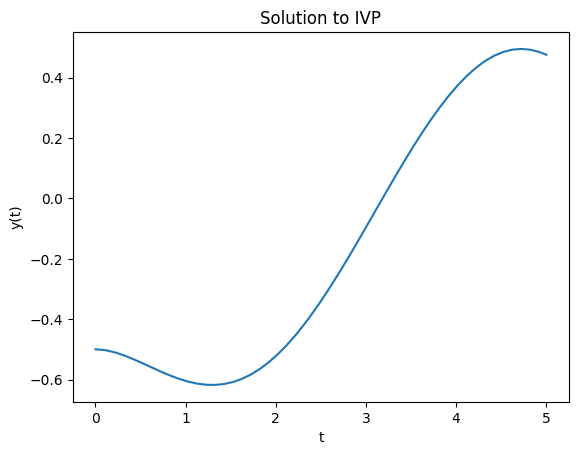

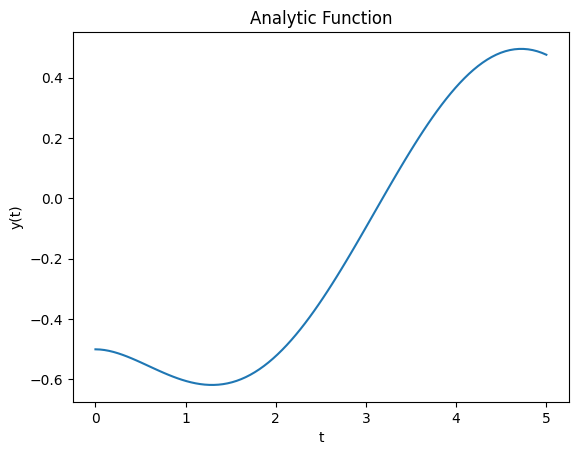

In [2]:
# Solve the IVP

# element 1: the ODE function
def ode(t,y):
    '''defines the ode system'''
    return np.array([y[1], np.sin(t) + y[0]])

# element 2: the time domain
t_span = (0,5)

# element 3: the initial conditions
y0 = np.array([-1/2, 0])

# Solve the Diff Equation
sol = solve_ivp(ode, t_span, y0, max_step = 0.1)

# Plot the data
plt.plot(sol.t, sol.y[0])
plt.title("Solution to IVP")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()


# Plot the analytic solution
t = np.linspace(0,5,100)
plt.plot(t, -1/2*(np.exp(-t) + np.sin(t)))
plt.title("Anmalytic Function")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### Problem 2

Use `solve_bvp` to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

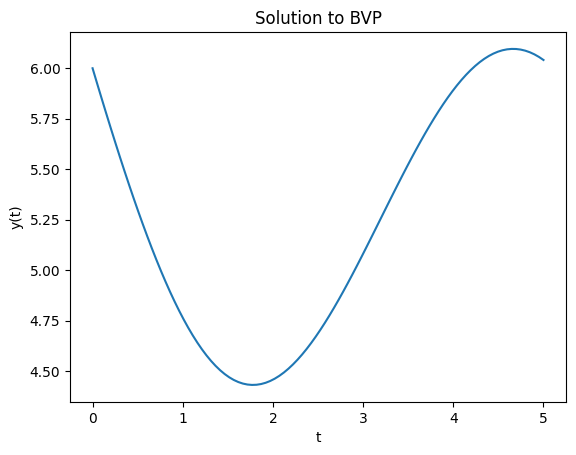

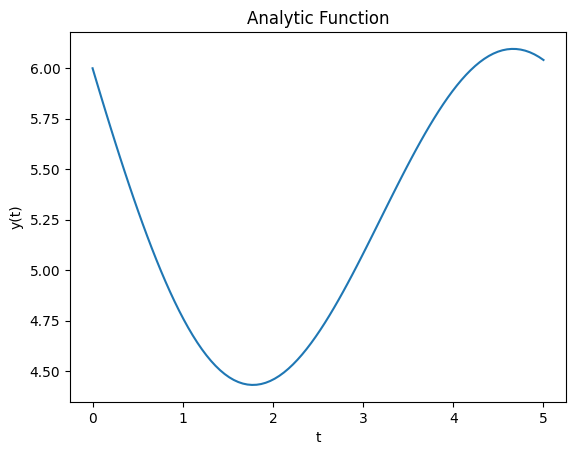

In [3]:
#element 1: the ODE function
def ode(t,y):
    ''' defines the ode system'''
    return np.array([y[1], -0.25*(np.exp(-t/2)) + np.sin(t) - np.cos(t) - y[1]])

# element 2: the boundary condition function
def bc(ya,yb):
    ''' define the boundary conditions'''
    # ya are the initial values
    # yb are the final values
    # each entry of the return array will be set to zero
    return np.array([ya[0] - 6, yb[1] + 0.324705])

# element 3: the time domain
t_steps = 100
t = np.linspace(0, 5, t_steps)

# element 4: the initial guess
y0 = np.ones((2, t_steps))

# Solve the system.
sol = solve_bvp(ode, bc, t, y0)

# Plot the data

# here we plot sol.x instead of sol.t
plt.plot(sol.x, sol.y[0])
plt.title('Solution to BVP')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()


# Plot the analytic solution
t = np.linspace(0,5,100)
plt.plot(t, (np.exp(-1/2 * t) - np.sin(t) + 5))
plt.title("Analytic Function")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### Problem 3

Use `solve_bvp` to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

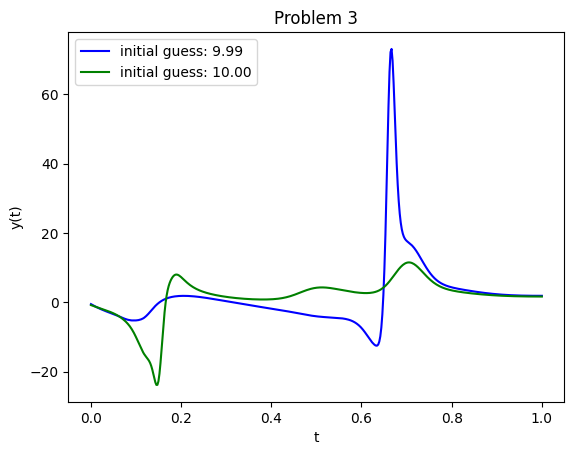

In [9]:
# element 1: the ODE function
def ode(t,y):
    ''' define the ode system'''
    return np.array([y[1],(1-y[1]) * 10 * y[0]])

# element 2: the boundary condition function
def bc(ya, yb):
    ''' define the boundary conditions'''
    # ya are the initial values
    # yb are the final values
    # each entry of the return array will be set to zero
    return np.array([ya[0] + 1, yb[0] - 3/2])

# element 3: the time domain
t_steps = 50
t = np.linspace(0, 1, t_steps)

# element 4a: the initial guess (10)
y0 = np.ones((2, t_steps)) * 10

# element 4b: the initial guess (9.99)
y1 = np.ones((2, t_steps)) * 9.99

# Solve the system
sol0 = solve_bvp(ode, bc, t, y0)
sol1 = solve_bvp(ode, bc, t, y1)

# Plot the data
plt.plot(sol1.x, sol1.y[0], color = 'b', label = 'initial guess: 9.99') 
plt.plot(sol0.x, sol0.y[0], color = 'g', label = 'initial guess: 10.00')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Problem 3')
plt.legend()
plt.show()


### Problem 4
Use `solve_ivp` to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_56931/3015419932.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax[0][0].show()
/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_56931/3015419932.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax[1][0].show()
/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_56931/3015419932.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax[2][0].show()


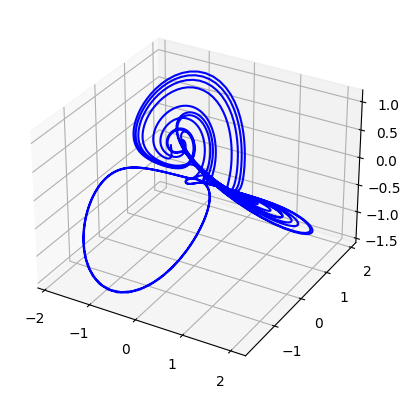

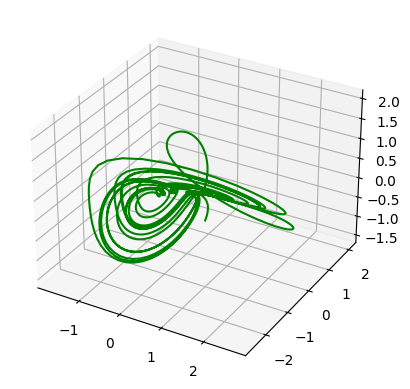

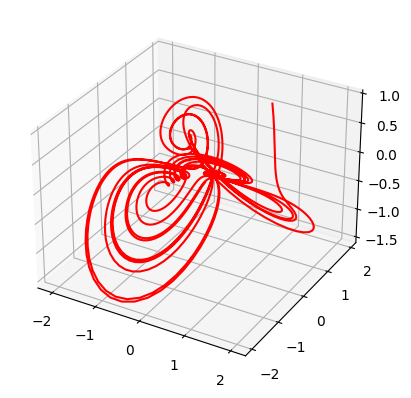

In [8]:
# Set the data
a = 0.2
b = 0.01
c = -0.4

# element 1: the ODE function
def ode(t,y):
    ''' defines the ode system'''
    return np.array([
        (a*y[0] + y[1] * y[2]),
        (b*y[0] + c*y[1] - y[0] * y[2]),
        (-y[2] - y[0] * y[1])
    ])
    
# element 2: the time domain
t_span = (0,400)

# element 3: the initial conditions
initial_values0 = np.array([-0.5, 0, 0.5])
initial_values1 = np.array([1, -1, 0])
initial_values2 = np.array([1, 1, 1])


# Solve the systems
sol0 = solve_ivp(ode, t_span, initial_values0, max_step = 0.1)

sol1 = solve_ivp(ode, t_span, initial_values1, max_step = 0.1)
sol2 = solve_ivp(ode, t_span, initial_values2, max_step = 0.1)

# Make the figure and axes
ax = []
for i in range(3):
    fig = plt.figure()
    ax.append([fig, fig.add_subplot(1,1,1, projection= '3d')])
    
# Plot the data
ax[0][1].plot(sol0.y[0], sol0.y[1], sol0.y[2], color = 'b', label = 'initial guess: 0.10')
ax[0][0].show()
ax[1][1].plot(sol1.y[0], sol1.y[1], sol1.y[2], color = 'g', label = 'initial guess: 0.11')
ax[1][0].show()
ax[2][1].plot(sol2.y[0], sol2.y[1], sol2.y[2], color = 'r', label = 'initial guess: 0.12')
ax[2][0].show()


## Problem 5

Write a function that uses `solve_bvp` to find $\psi$ and $E$ that are solutions to the Schroedinger equation for the potential $U(x)=x^2$ and with boundary conditions $\psi(-1)=\psi(1)=0, \psi'(-1)=1$.
By varying your initial guess for $E$, use your function to find solutions for several different values of $E$, and plot them together.

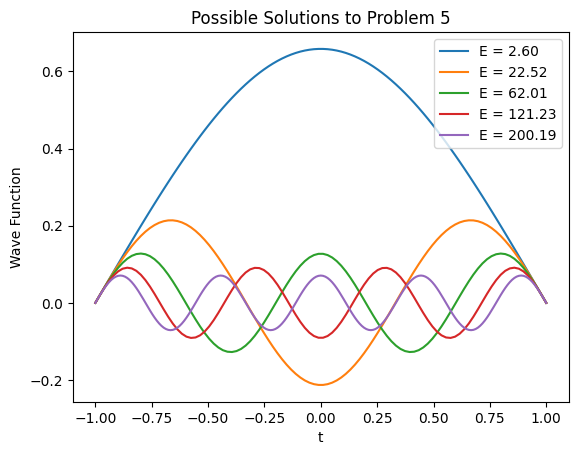

In [6]:
# the ODE function
def ode(t,y,p):
    '''Defines the ODE system'''
    return np.array([y[1],
        -p[0] * y[0] + t**2 * y[0]
    ])
    
# Define boundary conditions
def bcs(ya, yb, p):
    '''Defines the boundary conditions'''
    return np.array([
        ya[0],
        yb[0],
        ya[1] - 1
    ])
    
    
# Guess of the solution values
t = np.linspace(-1,1,100)
y_guess = np.ones((2,100)) * 0.001
p_guess1 = [2.60]
p_guess2 = [22.52]
p_guess3 = [62.01]
p_guess4 = [121.23]
p_guess5 = [200.00]

# Solve
sol1 = solve_bvp(ode, bcs, t, y_guess, p = p_guess1)
sol2 = solve_bvp(ode, bcs, t, y_guess, p = p_guess2)
sol3 = solve_bvp(ode, bcs, t, y_guess, p = p_guess3)
sol4 = solve_bvp(ode, bcs, t, y_guess, p = p_guess4)
sol5 = solve_bvp(ode, bcs, t, y_guess, p = p_guess5)

# Plot data
plt.plot(sol1.x, sol1.y[0], label = 'E = 2.60')
plt.plot(sol2.x, sol2.y[0], label = 'E = 22.52')
plt.plot(sol3.x, sol3.y[0], label = 'E = 62.01')
plt.plot(sol4.x, sol4.y[0], label = 'E = 121.23')
plt.plot(sol5.x, sol5.y[0], label = 'E = 200.19')
plt.legend()
plt.xlabel('t')
plt.ylabel('Wave Function')
plt.title('Possible Solutions to Problem 5')
plt.show()

    
    